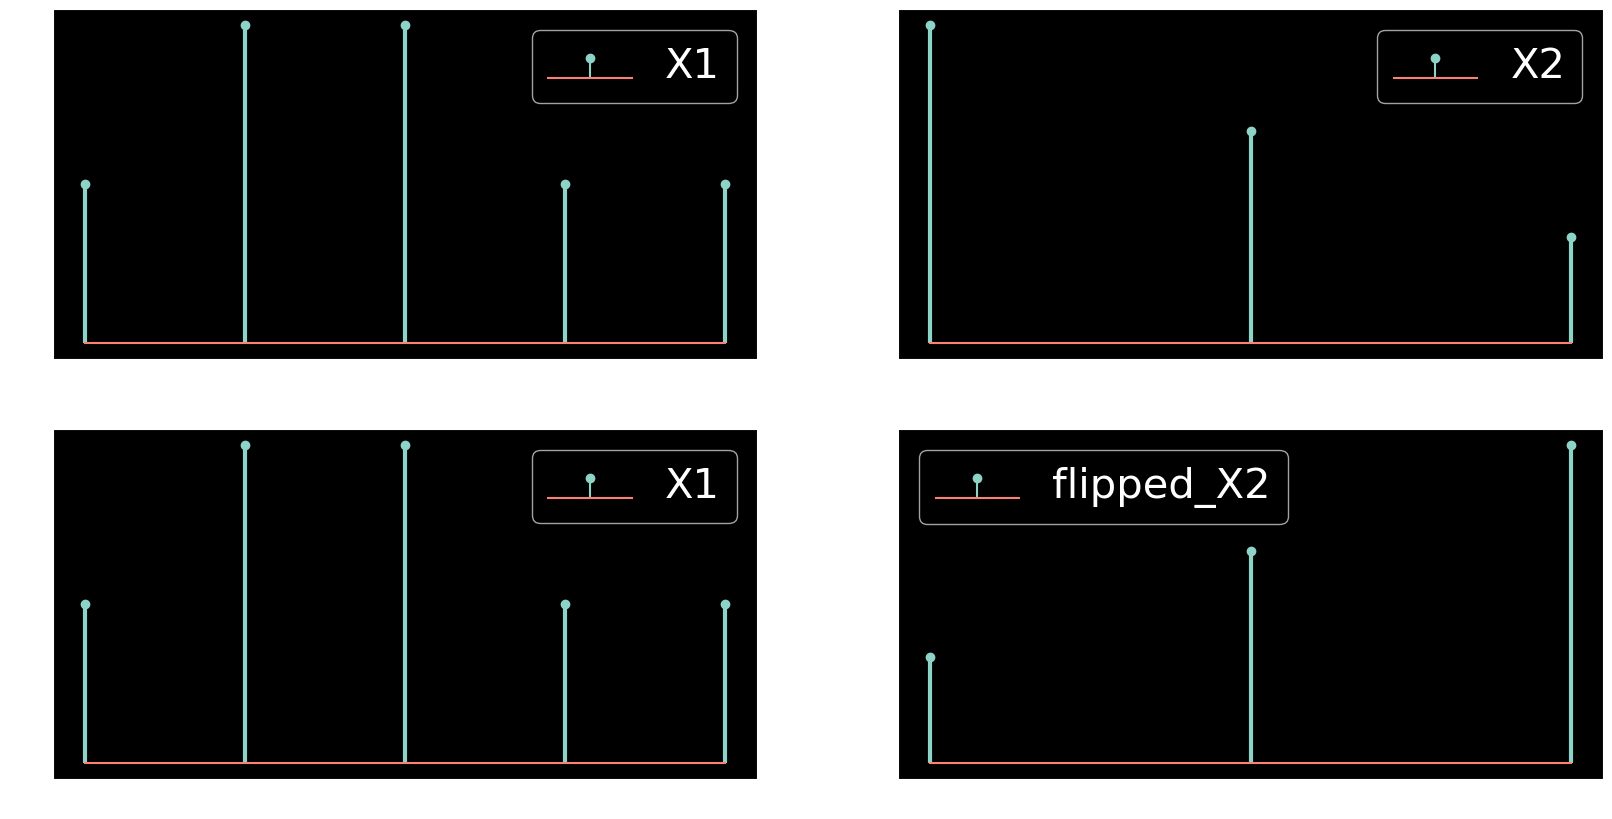

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import style
#generating and Plotting X1 
x1=np.array([1,2,2,1,1])
n1=np.array([0,1,2,3,4])
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.subplot(2,2,1)
markerline,stemlines,baseline=plt.stem(n1,x1,label='X1')
plt.setp(stemlines,'linewidth',3)
plt.legend(fontsize=30)
 #generation and plotting X2
x2=np.array([3,2,1])
n2=np.array([0,1,2])
plt.subplot(2,2,2)
markerline,stemlines,baseline=plt.stem(n2,x2,label='X2')
plt.setp(stemlines,'linewidth',3)
plt.legend(fontsize=30)
#Plotting X1 at position 3
plt.subplot(2,2,3)
markerline,stemlines,baseline=plt.stem(n1,x1,label='X1')
plt.legend(fontsize=30)
plt.setp(stemlines,'linewidth',3)
#flipping X2 at postion 4
f_x2=x2[::-1]
n3=np.array([-2,-1,0])
plt.subplot(2,2,4)
markerline,stemlines,baseline =plt.stem(n3,f_x2,label='flipped_X2')
plt.setp(stemlines,'linewidth',3)
plt.legend(fontsize=30)

plt.show()

In [3]:
nx1=len(x1)
nx2=len(x2)
nconv=nx1+nx2-1
print(nx1)
print(nx2)
print(nconv)

5
3
7


2
[0. 0.]
[0. 0. 1. 2. 2. 1. 1. 0. 0.]


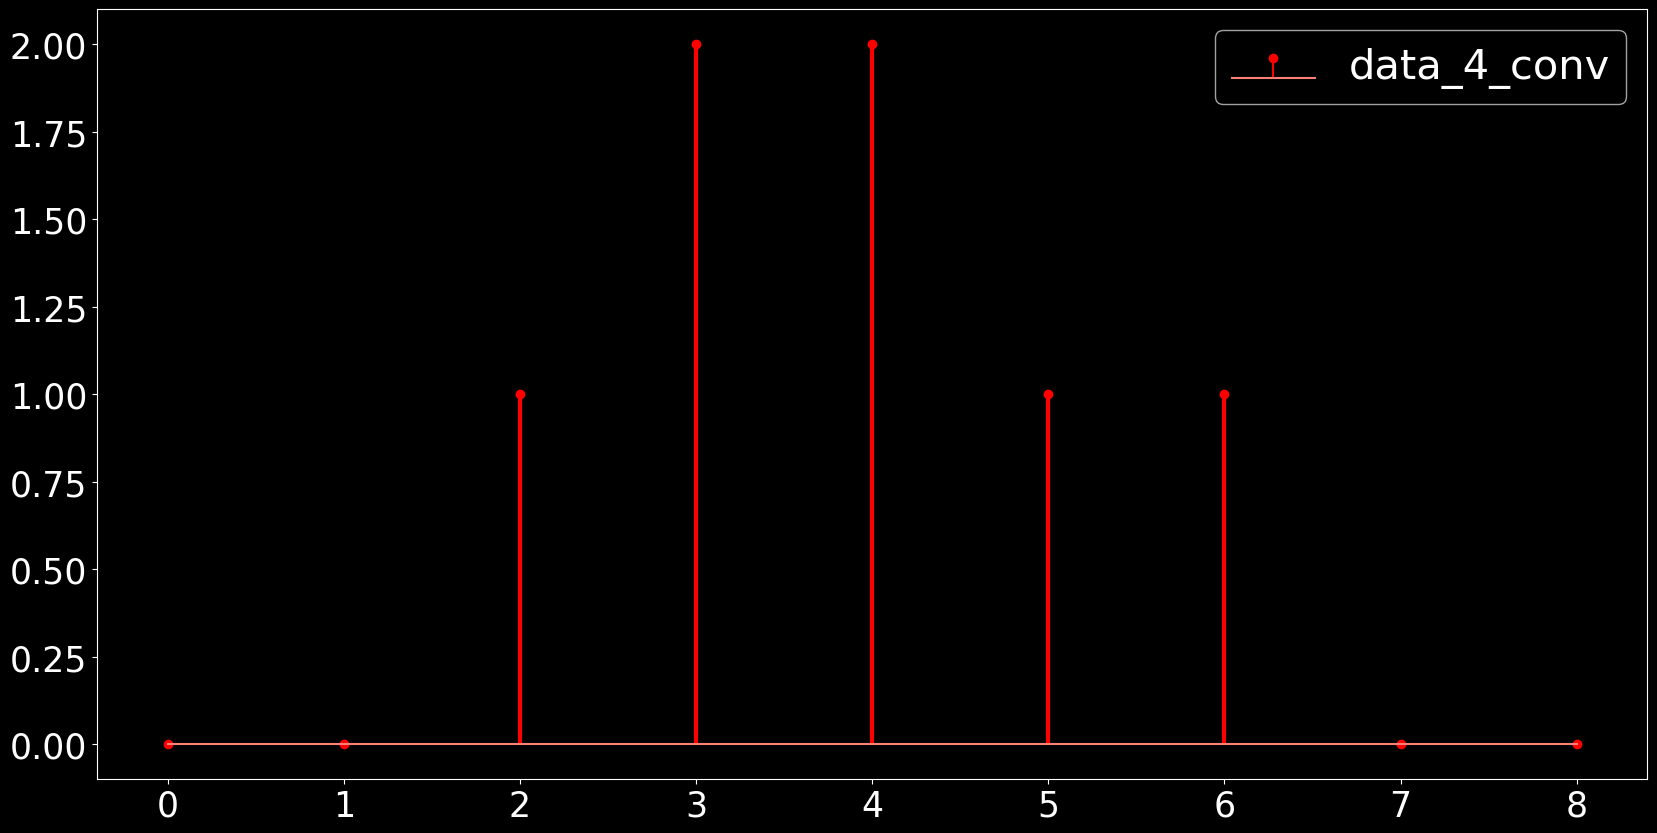

In [4]:
import numpy as np
half_nx2=int(np.round(nx2/2))
data_4_conv = np.concatenate((np.zeros(half_nx2),x1,np.zeros(half_nx2)),axis=0)
print(half_nx2)
print(np.zeros(half_nx2))
print((data_4_conv))
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
markersize,stemlines,baseline=plt.stem(data_4_conv,'ro',label='data_4_conv')
plt.setp(stemlines,'linewidth',3)
plt.legend(fontsize=30)
plt.show()

In [9]:
convres=np.zeros(nconv) #created a blank array to store result
for k in range(0,nconv):#slide it step by step
    convres[k]=np.sum(f_x2*data_4_conv[k:k+nx2])#Take the slice of the data_4_conv[i:i+nx2],
    #f_x2 *...//	Multiply filter and data slice,convres[i] store data
convres


array([ 3.,  8., 11.,  9.,  7.,  3.,  1.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


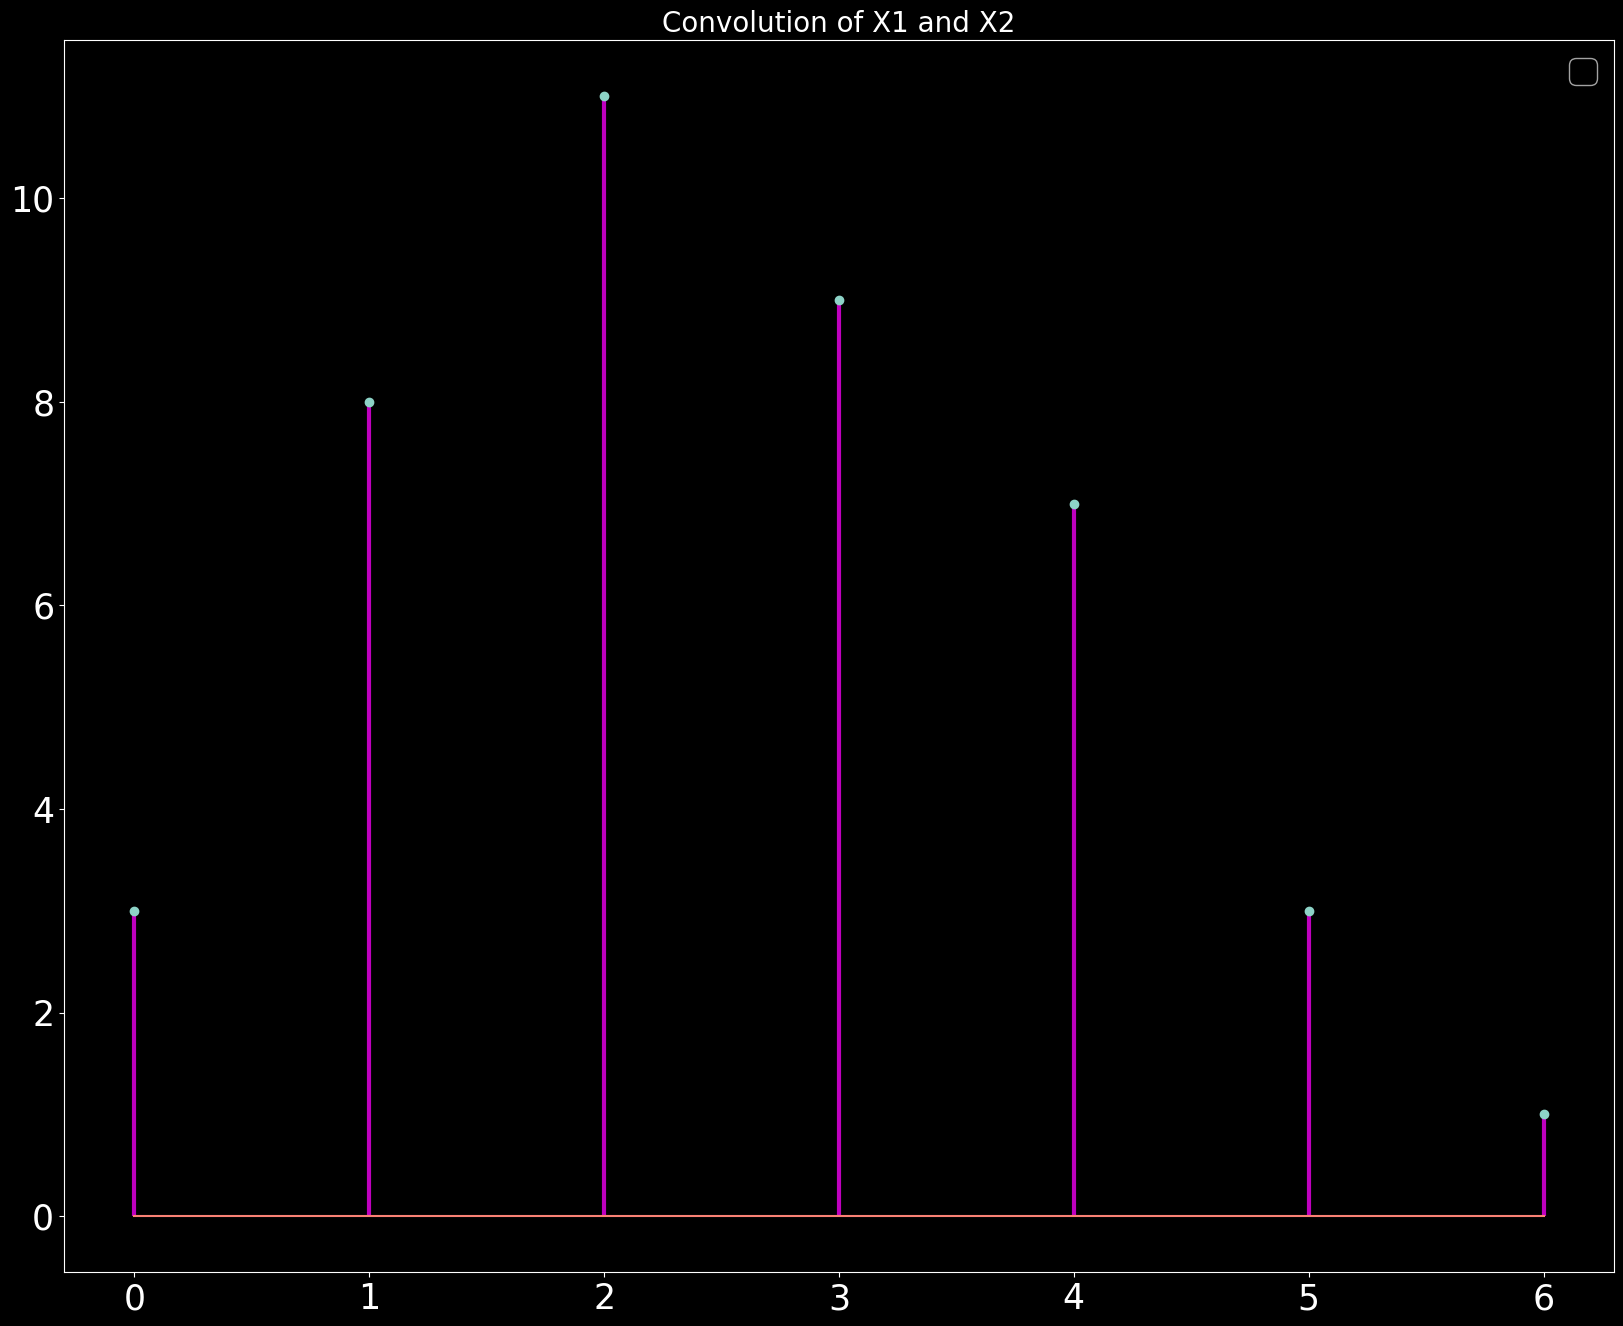

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
plt.figure(figsize=(20,16))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
markerline,stemlines,baseline=plt.stem(convres)
plt.setp(stemlines,'linewidth',3)
plt.setp(stemlines,color='m')
plt.title('Convolution of X1 and X2',fontsize=20)
plt.legend(fontsize=25)
plt.show()

In [18]:
np.convolve(x1,x2,mode='full')

array([ 3,  8, 11,  9,  7,  3,  1])

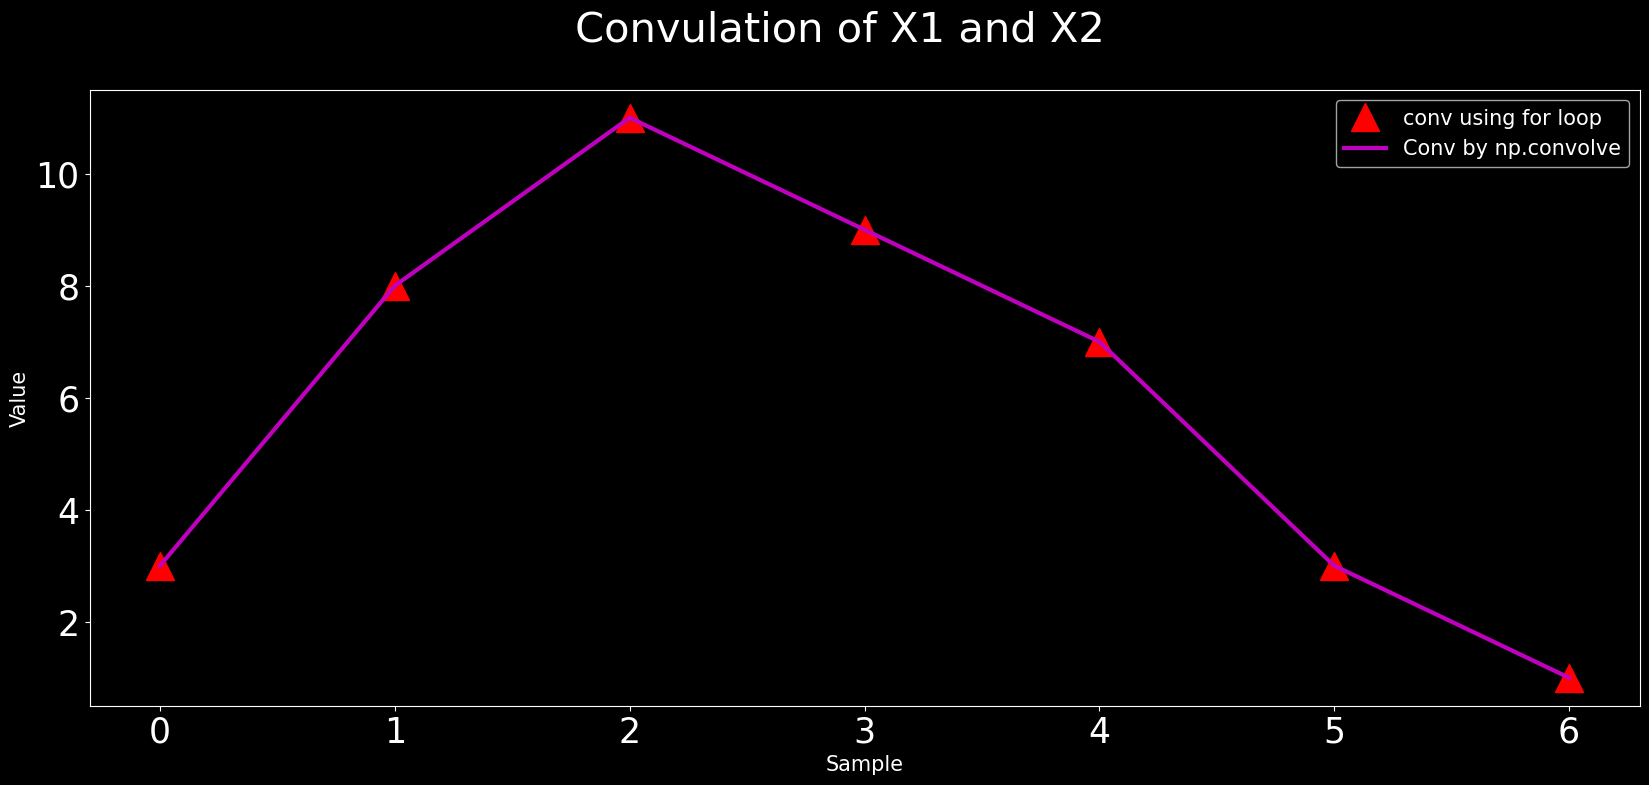

In [24]:
plt.figure(figsize=(20,8))
plt.suptitle('Convulation of X1 and X2',fontsize=30)
style.use('dark_background')
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.plot(convres,'r^',markersize=20,label='conv using for loop')
plt.plot(np.convolve(x1,x2,mode='full'),'m-',linewidth=3,label='Conv by np.convolve')
plt.xlabel('Sample',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.legend(fontsize=15)
plt.show()

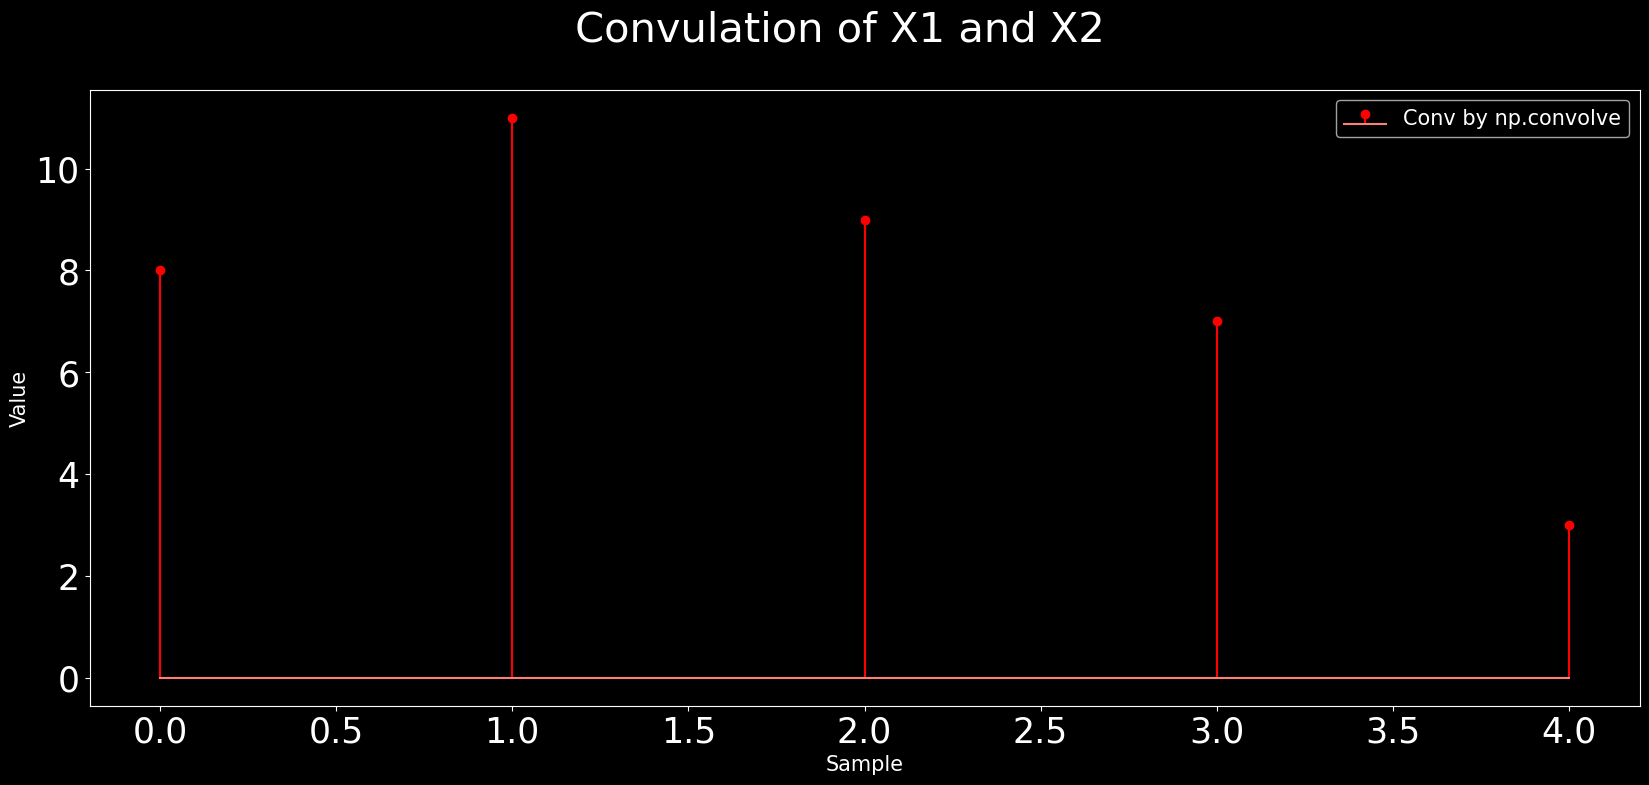

In [29]:
plt.figure(figsize=(20,8))
plt.suptitle('Convulation of X1 and X2',fontsize=30)
style.use('dark_background')
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.stem(np.convolve(x1,x2,mode='same'),'ro',label='Conv by np.convolve')
plt.xlabel('Sample',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.legend(fontsize=15)
plt.show()

768


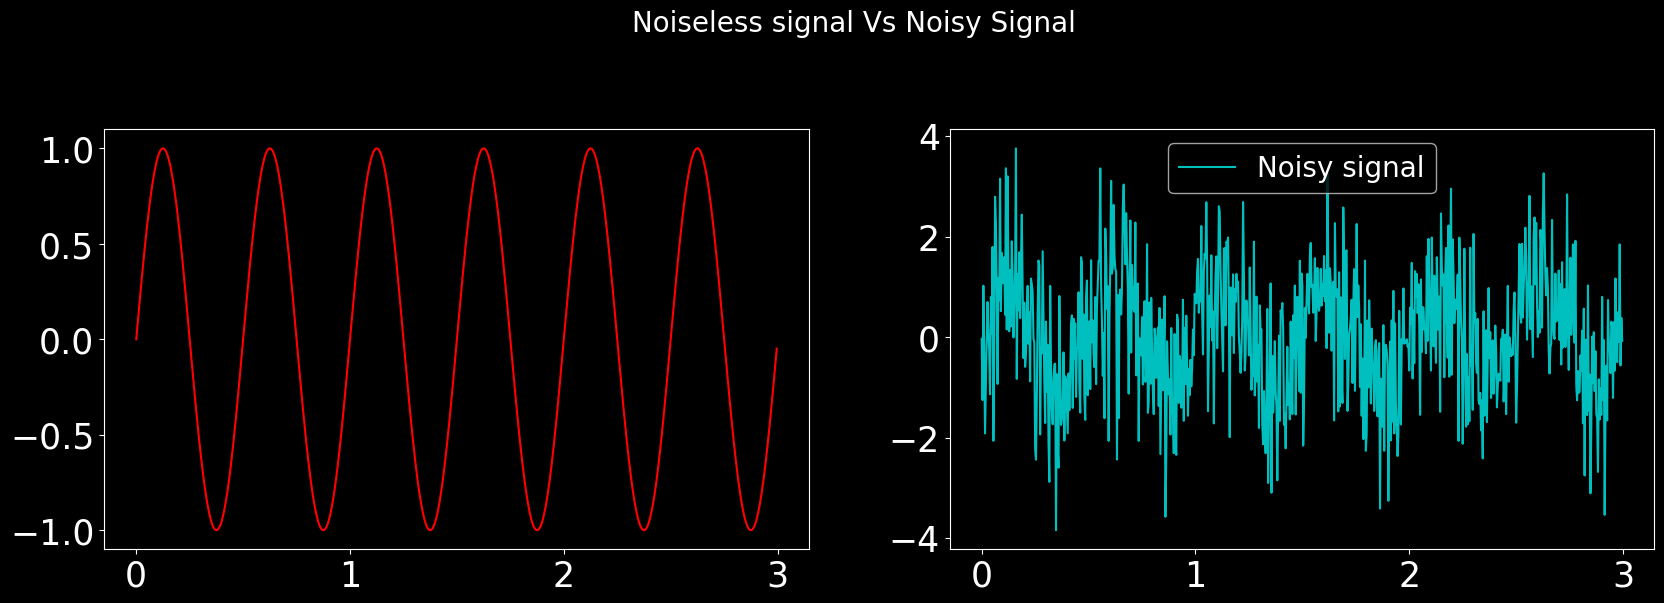

In [2]:
#Denoising of Signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
srate=256 #hz
t=np.arange(0,3,1/srate)
pnts=len(t)
print(pnts)
plt.figure(figsize=(20,12))
x=np.sin(2*np.pi*2*t)
noise=np.random.randn(pnts)
noisysignal=noise + x
style.use('dark_background')
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.suptitle('Noiseless signal Vs Noisy Signal',fontsize=20)
plt.subplot(2,2,1)
plt.plot(t,x,'r',label='Sinewave')
plt.subplot(2,2,2)
plt.plot(t,noisysignal,'c',label='Noisy signal')
plt.legend(fontsize=20)
plt.show()


In [ ]:
filter=2*np.ones(50)/10 #moving Average filter, this will move on noisy signal and calculate the original value
filter

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

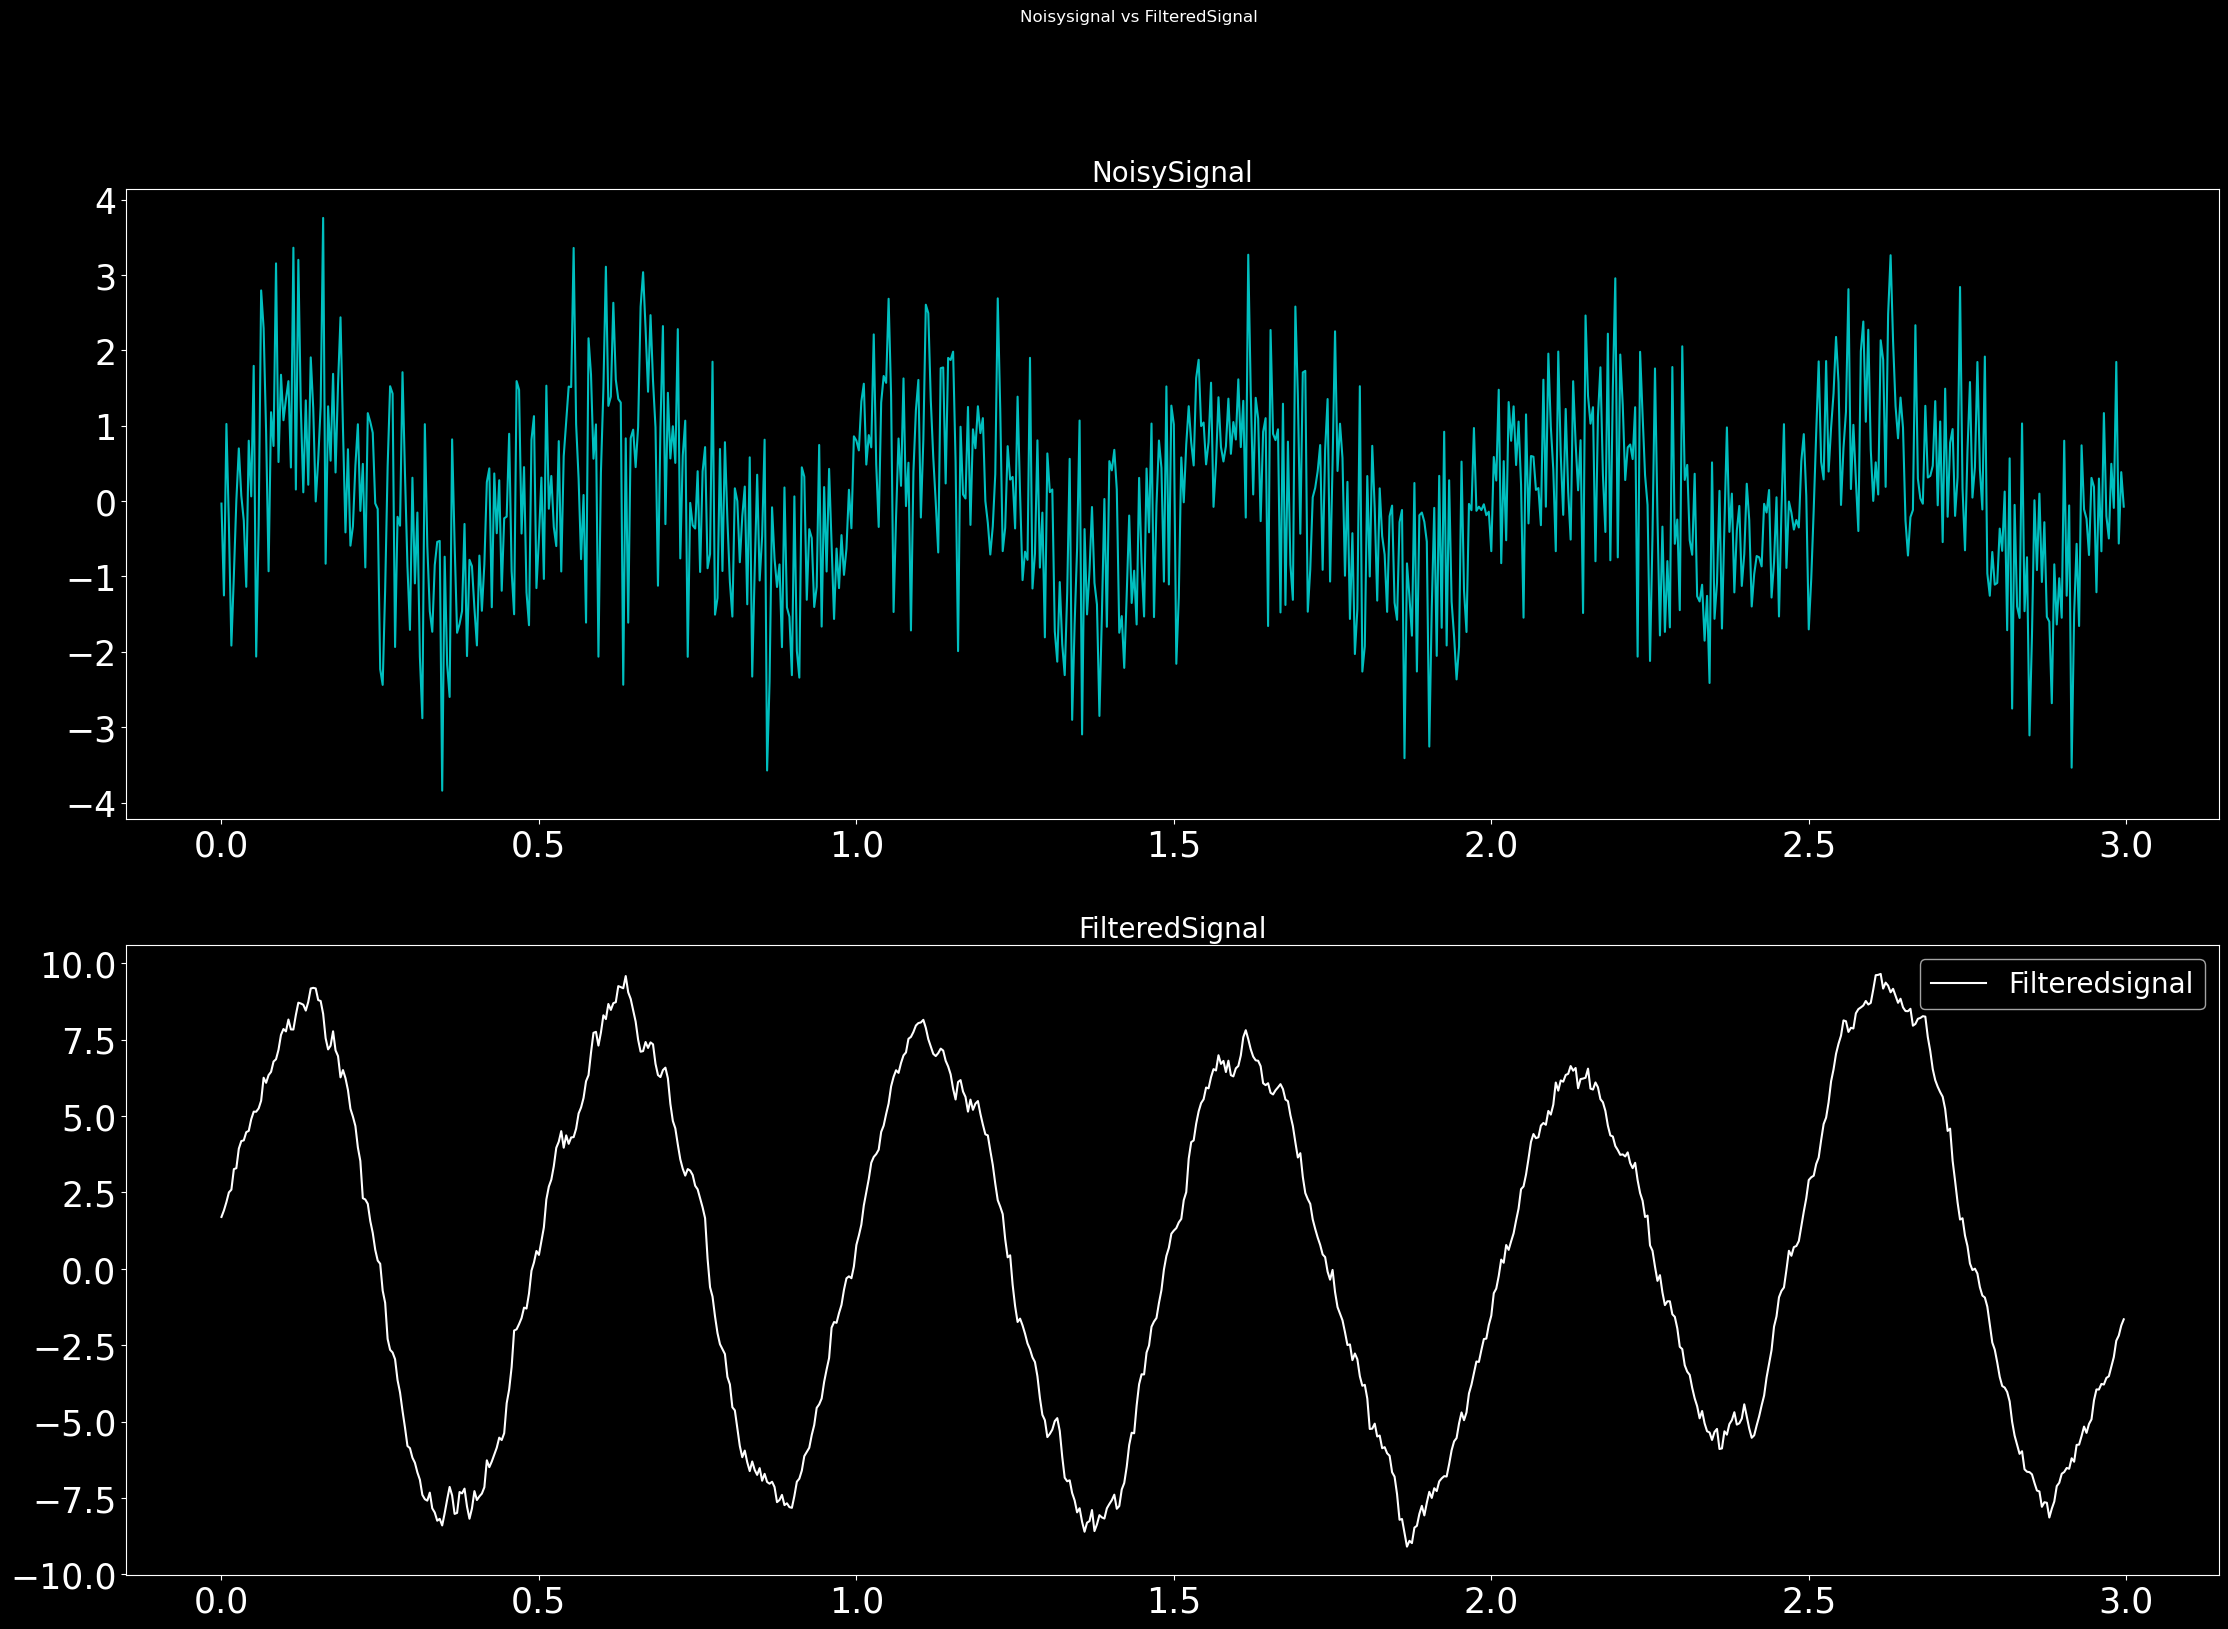

In [ ]:
filteredsignal=np.convolve(noisysignal,filter,mode='same')
plt.figure(figsize=(27,18))
plt.suptitle('Noisysignal vs FilteredSignal')
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.subplot(2,1,1)
plt.plot(t,noisysignal,'c',label='noisysignal')
plt.title('NoisySignal',fontsize=20)
plt.subplot(2,1,2)
plt.plot(t,filteredsignal,'r',label='Filteredsignal')
plt.title('FilteredSignal',fontsize=20)
plt.legend(fontsize=20)
plt.show()

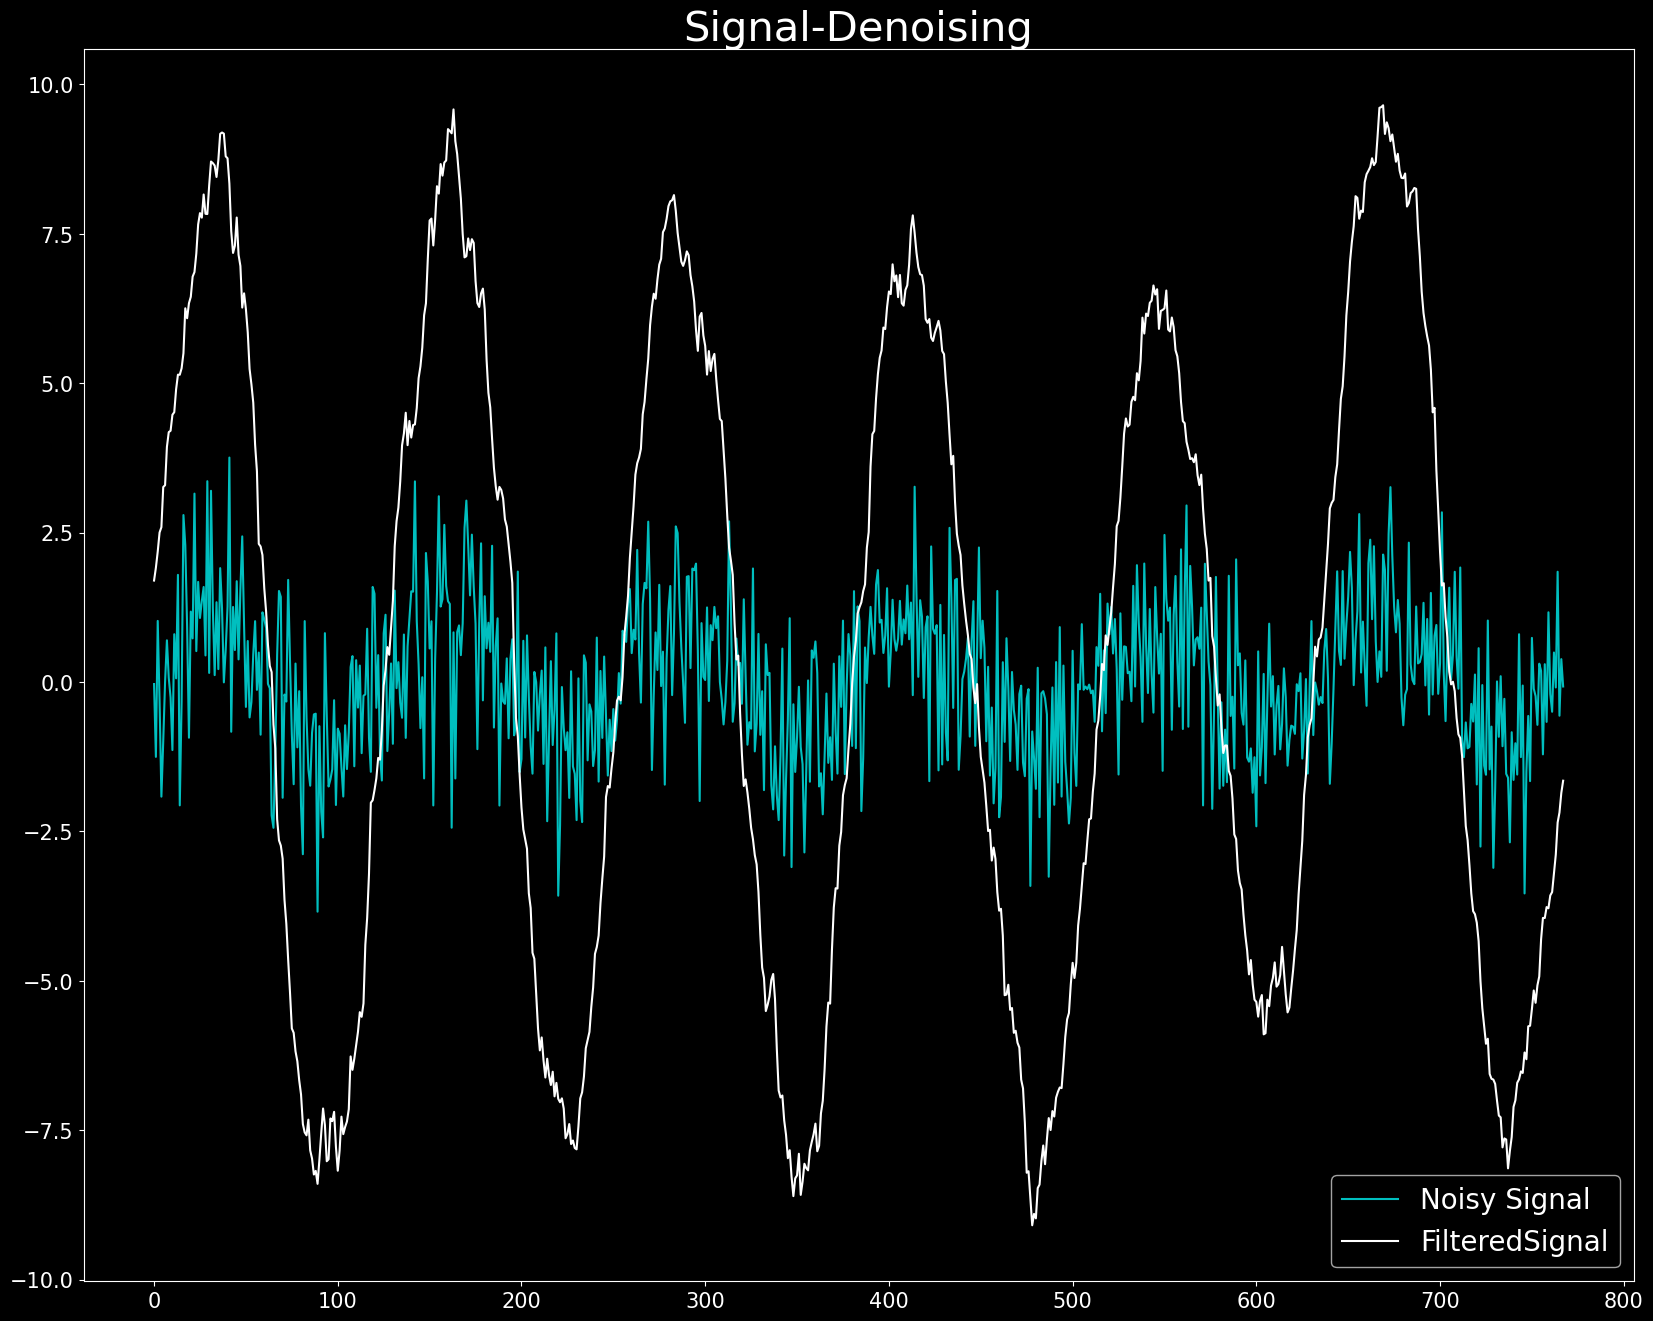

In [23]:
plt.figure(figsize=(20,16))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(noisysignal,'c',label='Noisy Signal')
plt.plot(filteredsignal,'w',label='FilteredSignal')
plt.legend(fontsize=20)
plt.title('Signal-Denoising',fontsize=30)
plt.show()


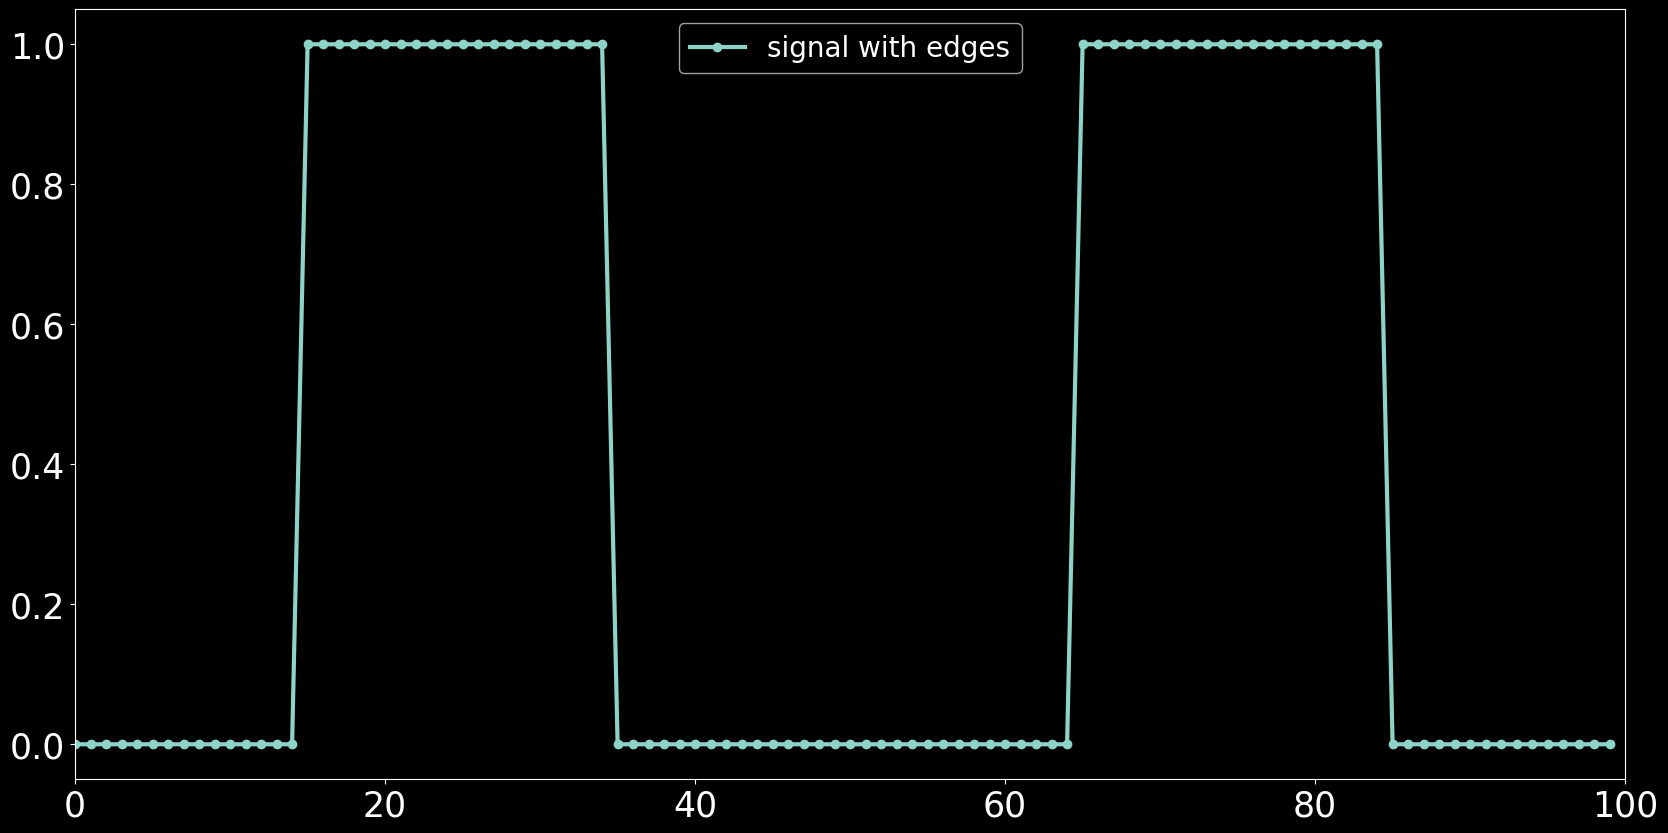

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
Newsig=np.zeros(100)
Newsig[15:35]=1
Newsig[65:85]=1
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.xlim(0,100)
plt.plot(Newsig,'o-',linewidth=3,label='signal with edges')
plt.legend(fontsize=20)
plt.show()

In [31]:
kernel=np.array([0.5,0.3,0.1,0,-0.1,-0.3,-0.5])
kernel

array([ 0.5,  0.3,  0.1,  0. , -0.1, -0.3, -0.5])

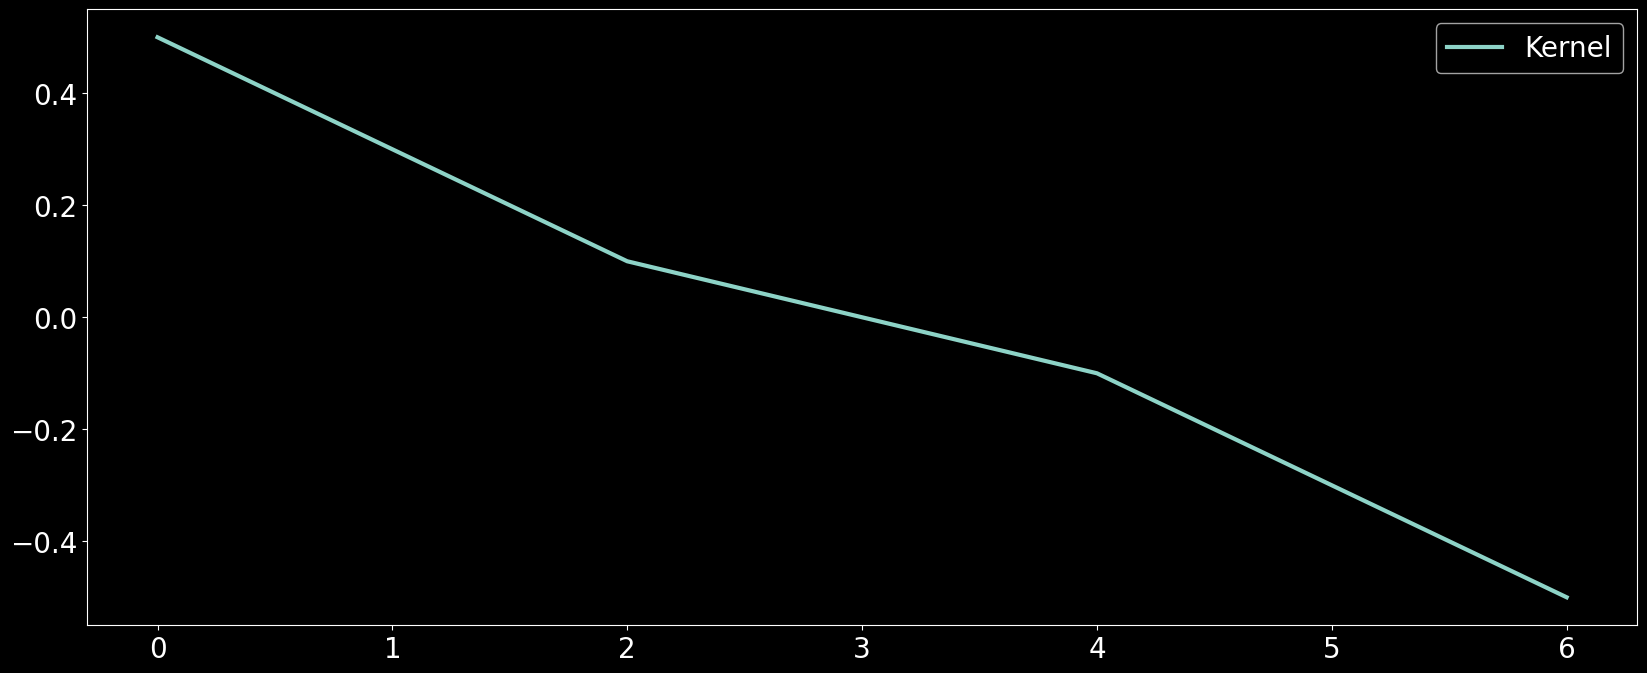

In [32]:
plt.figure(figsize=(20,8))
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.plot(kernel,linewidth=3,label='Kernel')
plt.legend(fontsize=20)
plt.show()


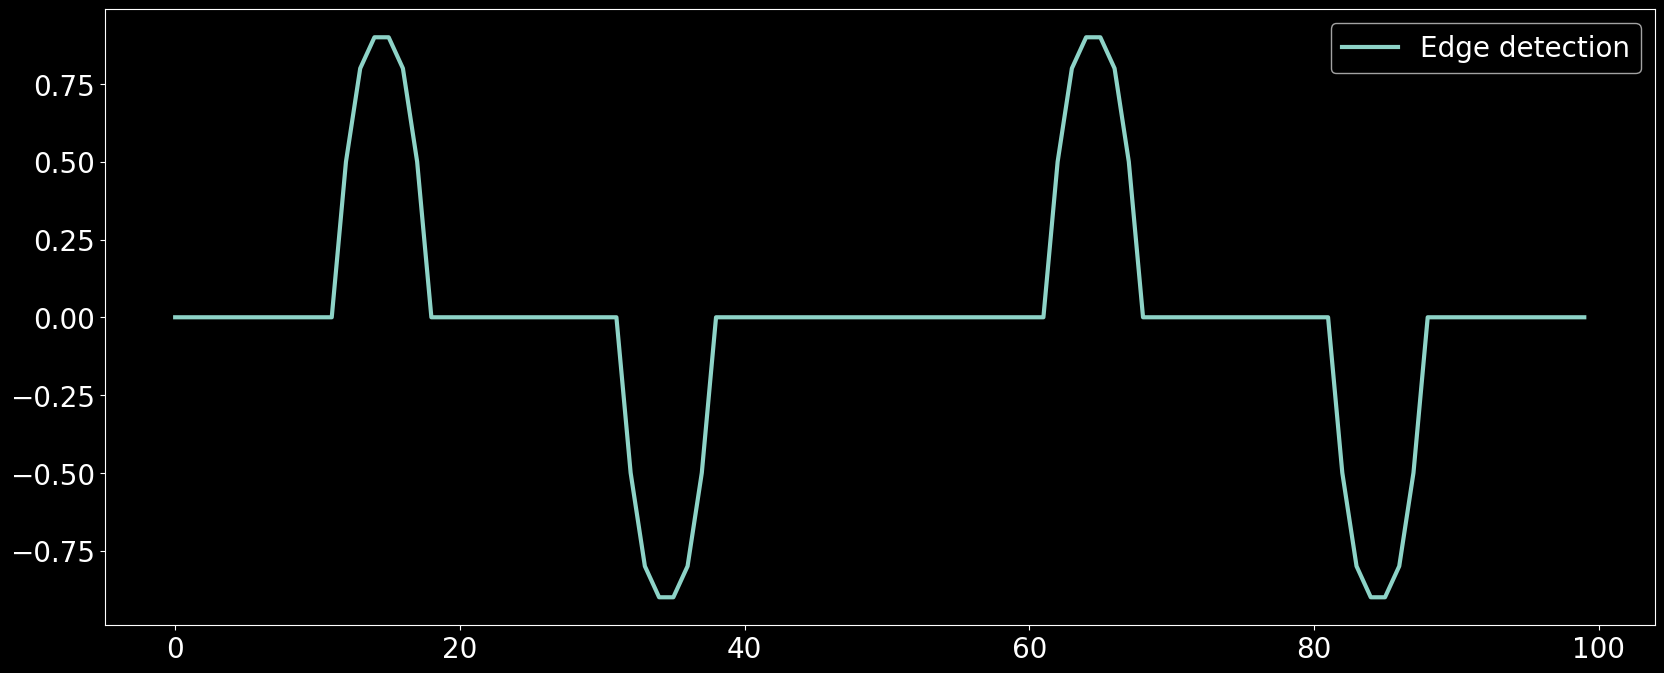

In [ ]:
filt_sig=np.convolve(Newsig,kernel,mode='same')
plt.figure(figsize=(20,8))
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.plot(filt_sig,linewidth=3,label='Edge detection')
plt.legend(fontsize=20)
plt.show()


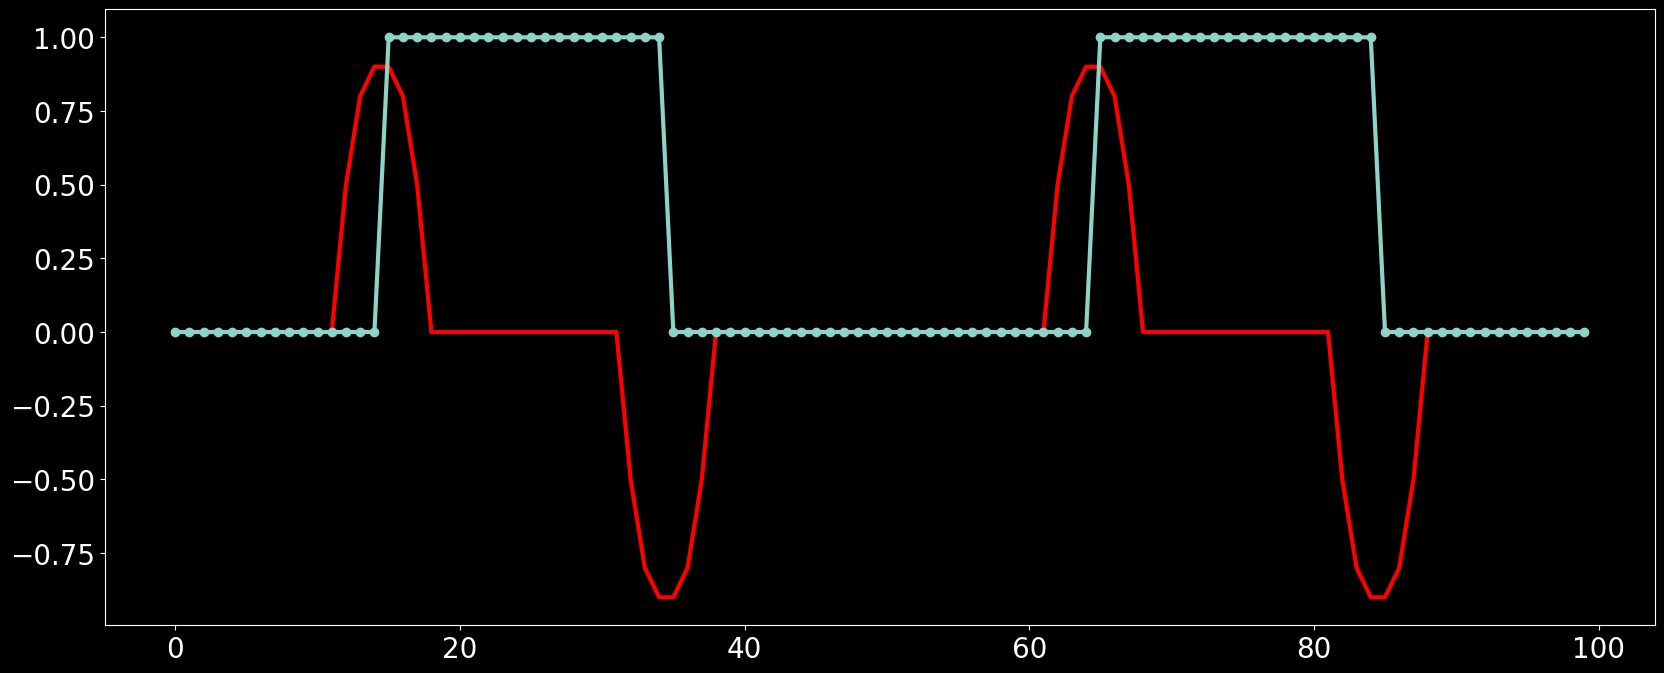

In [36]:
plt.figure(figsize=(20,8))
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.plot(filt_sig,'r',linewidth=3,label='Edge detection')
plt.plot(Newsig,'o-',linewidth=3,label='signal with edges')
plt.show()